# **IMPORT:**

I kodeblokken under importeres flere bilbioteker som er nødvendig for å jobbe med en segmenteringsoppgave som bruker masks.

In [35]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path 
from fastai.vision.all import *
from fastai import *
from fastai.vision.augment import *
from PIL import Image


import os

# **GETTING DATA**:

I denne koden blir det definert stier (paths) til datasettet for "Understanding Cloud Organization" -konkurransen på Kaggle. Det er en til hoved path som er filen "understanding_cloud_organization, og en til treningssettet, og en til test-settet. Forstår at det jpg bilder vi har og jobbe med.

In [36]:
#HENTE DATA og sette det i path.

path = Path('/kaggle/input/understanding_cloud_organization')
train = path/'train_images'
test = path/'test_images'
os.listdir(path)




['sample_submission.csv', 'train_images', 'train.csv', 'test_images']

# **EXPLORE DATA:**

Her utforsker vi litt hvilke data vi har og jobbe med. Vi ser at det er 2 kolonner: Image_Label, og EncodedPixels. Forstår at det er 4 labels Fish, Flower, Gravel og Sugar. EncodedPixels denne kolonnen er en streng som inneholder Run-length Encoding (RLE) av cloud objects. Hvert bilde kan ha opp mot 4 labels og minimium 1 label må det ha.

In [37]:
train_df = pd.read_csv(path/'train.csv')
train_df.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 270518 937 271918 937 273318 937 274718 937 276118 937 277518 937 278918 937 280318 937 281718 937 283118 937 284518 937 285918 937 287318 937 288718 937 290118 937 291518 937 292918 937 294318 937 295718 937 297118 937 298518 937 299918 937 301318 937 302718 937 304118 937 305518 937 306918 937 308318 937 309718 937 311118 937 312518 937 313918 937 315318 937 316718 937 318118 937 319518 937 320918 937 322318 937 323718 937 325118 937 326518 937 327918 937 329318 937 330718 937 332118 937 333518 937 334918 937 336318 937 337718 937 339118 937 34...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765 1002 1361165 1002 1362565 1002 1363965 1002 1365365 1002 1366765 1002 1368165 1002 1369565 1002 1370965 1002 1372365 1002 1373765 1002 1375165 1002 1376565 1002 1377965 1002 1379365 1002 1380765 1002 1382165 1002 1383565 1002 1384965 1002 1386365 1002 1387765 1002 1389165 1002 1390565 1002 1391965 1002 1393365 1002 1394765 1002 1396165 1002 1397565 1002 1398965 1002 1400365 1002 1401765 1002 1403165 1002 1404565 1002 1405965 1002 1407365 1002 1408765 1002 1410165 1002 1411565 1002 1412965 1002 1414365 1002 1415765 1002 1417165 1002 1418565 100...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 239410 881 240810 881 242210 881 243610 881 245010 881 246410 881 247810 881 249210 881 250610 881 252010 881 253410 881 254810 881 256210 881 257610 881 259010 881 260410 881 261810 881 263210 881 264610 881 266010 881 267410 881 268810 881 270210 881 271610 881 273010 881 274410 881 275810 881 277210 881 278610 881 280010 881 281410 881 282810 881 284210 881 285610 881 287010 881 288410 881 289810 881 291210 881 292610 881 294010 881 295410 881 296810 881 298210 881 299610 881 301010 881 302410 881 303810 881 305210 881 306610 881 308010 881 30...


**Dette er det vi egentlig prøvde å få til, men fikk det ikke til å funke siden resultatet blir overlappet**

In [ ]:
def get_mask_labels(file_path):
    masks = train_df.loc[train_df['Image_Label'].str.startswith(file_path.name[:-4])]['EncodedPixels']
    mask_rles = [str(m) for m in masks.fillna('')]
    combined_mask = np.zeros((1400, 2100), dtype=np.int32)
    
    for idx, mask_rle in enumerate(mask_rles, start=1):
        try:  # Label finnes ikke
            mask = rle_decode(mask_rle)
        except:
            mask = np.zeros((1400, 2100))
        
        combined_mask += idx * (mask == 1)

    return combined_mask

**get_mask_labels(file_path):** Denne funksjonen tar inn en filbane og returnerer et bilde av masken som er tilknyttet bildet i filbanen. 


**rle_decode(mask_rle, shape=(1400, 2100)):** Denne funksjonen tar inn en mask_rle og en shape-parameter, dekoder RLE'en og en numpy-array som representerer masken blir returnert.

**get_train_imgs():** Denne funksjonen returnerer en liste over filbaner for alle bildene i treningsdatasettet. Den bruker train_df til å hente unike bildnavn og lager deretter filbaner for hvert bilde ved å legge til bilde-navnet i path.

**get_image_files_in_list(file_list):** Denne funksjonen returnerer listen over filer som den mottar som input.

**path = Path("/kaggle/input/understanding_cloud_organization/train_images"):** Her opprettes en Path-instans som peker på katalogen der treningsbildene er lagret.

**train_img_names = get_train_imgs():** Denne funksjonen henter listen over filbaner til treningsbildene og lagrer listen i train_img_names().

In [38]:

def get_mask_labels(file_path):
    masks = train_df.loc[train_df['Image_Label'].str.startswith(file_path.name[:-4])]['EncodedPixels']
    mask_rle = [str(m) for m in masks.fillna('')][3]
    try: # label might not be there!
        mask = rle_decode(mask_rle)
    except:
        mask = np.zeros((1400, 2100))
    return Image.fromarray(mask)
#Definert en funksjon kalt rle_decode som tar inn 2 parametere, mask_rle som sier noe 

def rle_decode(mask_rle, shape=(1400, 2100)):
   
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')
    
def get_train_imgs():
    img_names = train_df['Image_Label'].apply(lambda x: x.split('_')[0]).unique()
    return [path/f'{img_name}' for img_name in img_names[:]]

def get_image_files_in_list(file_list):
    return file_list

path = Path("/kaggle/input/understanding_cloud_organization/train_images")
train_img_names = get_train_imgs()  


I koden under opprettes det en datablock med parametere ImageBlock og Maskblock. Imageblock = bileinput, og MaskBlock = makeoutput. Get _items funksjonen henter bildefilene, mens splitter = deler datasettet i trenings og valideringssett. get_y = henter Maskelapper, items_tfms og batfch_tfms sørger for å agumentere bildene slik at de får riktig endring alle sammen. Etter det bli det opprettet en dls = dataloader, denne har en batchstørrelse på 9.


In [ ]:
cloud_data = DataBlock(
    blocks=(ImageBlock, MaskBlock),
    get_items=get_image_files_in_list,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_mask_labels,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224)
)

dls = cloud_data.dataloaders(train_img_names, bs=9

show_batch() viser et tilfeldig utvalg av bilder og masker fra trenings og valideringssettet. Dette brukes for å visualisere bilder og sjekke at datablocken gjør jobben sin.

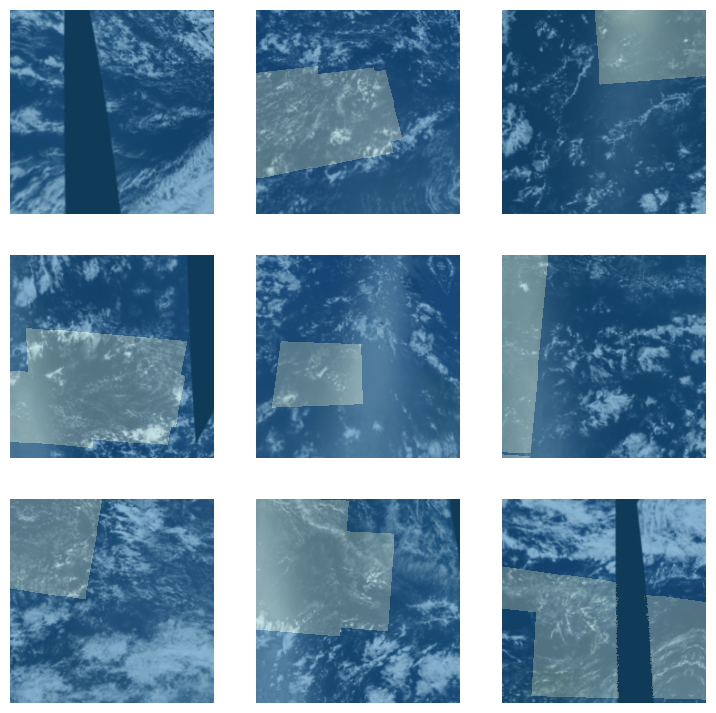

In [39]:
dls.show_batch()

Det blir brukt unet_learner siden den er godt egnet for segmentering og masks. setter inn datablocken (dls), resnet 34, n_out=2 (2 outpus target og prediciton), og Dice brukes istedenfor acuracy siden acuracy da crashet programmet, men med dice fungerte det. Dice sier noe om hvor vidt de matcher, og nærmere 1 tyder på en god modell. 

In [40]:
learn = unet_learner(dls, resnet34, n_out=2, metrics=Dice)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Vi trener modellen 3 ganger, og ser at dice metrics blir bedre for hver gang og ender til slutt på 0.56. Det er rom for masse fobedring, men det viser at programmet fungerer til en viss grad (0.56).

In [41]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,dice,time
0,0.358734,0.380916,0.558970,11:46


epoch,train_loss,valid_loss,dice,time
0,0.316815,0.337065,0.380460,11:49
1,0.308214,0.316818,0.494263,11:42
2,0.294873,0.305548,0.560487,11:47


Og når man ser på resultatet predikerer modellen bare 1 label.

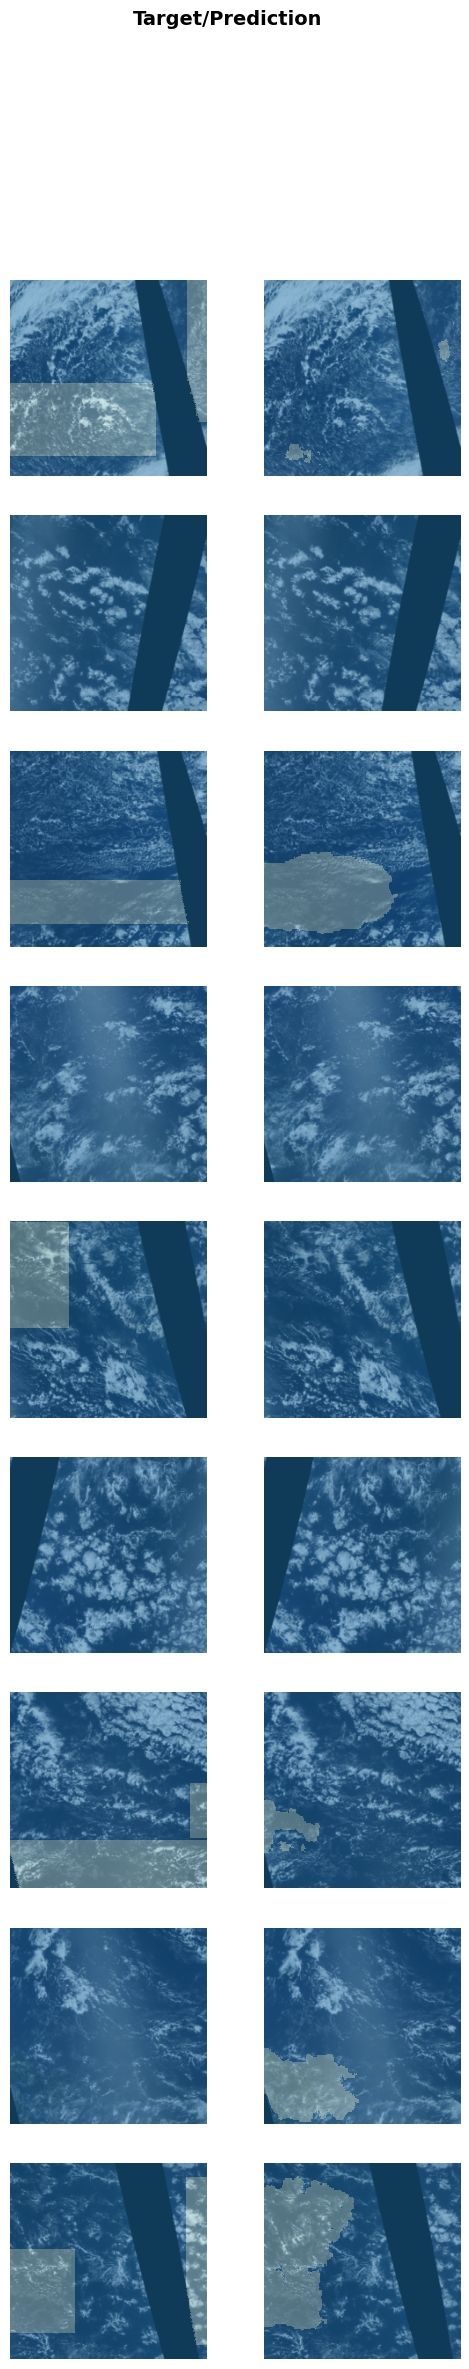

In [42]:
learn.show_results()